In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [0]:
!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse
from google.colab import auth
auth.authenticate_user()
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()
import getpass
!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass()
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}

In [0]:
!mkdir -p drive
!google-drive-ocamlfuse drive

In [0]:
path = "drive/colab/JUSTCODEIT/"

In [5]:
!pip install xlrd

    100% |████████████████████████████████| 112kB 3.1MB/s 


In [0]:
data = pd.read_excel(path+"Events Report of Drivers in Ahmedabad_16-07 to 31-07.xlsx")

In [7]:
data.head()

,Event Name,Event Time,Event Value (Upper limit =51km/h),Event Unit,Bus no.,Route Name,Stop Code,Stop Name,Latitude,Longitude
0,Idling,16.07.2018 03:05:47,180.0,Seconds,31,5U_Vasna - Naroda Gam_NORMAL,275,Vasna,23.002243,72.547849
1,Idling,16.07.2018 03:08:12,180.0,Seconds,34,6E_Narol - Odhav Talav_NORMAL,77,Narol,22.972980,72.589567
2,Idling,16.07.2018 03:08:47,180.0,Seconds,31,5U_Vasna - Naroda Gam_NORMAL,275,Vasna,23.002243,72.547849
3,Idling,16.07.2018 03:11:12,180.0,Seconds,34,6E_Narol - Odhav Talav_NORMAL,77,Narol,22.972980,72.589567
4,Idling,16.07.2018 03:12:26,180.0,Seconds,31,5U_Vasna - Naroda Gam_NORMAL,275,Vasna,23.002243,72.547849


In [0]:
data['Event Time'] = data['Event Time'].apply(lambda s: int(s))

In [15]:
data.tail()

,Event Name,Event Time,Event Value (Upper limit =51km/h),Event Unit,Bus no.,Route Name,Stop Code,Stop Name,Latitude,Longitude
401394,Sharp Corner,23,0.418,m/s2,24,7U_Zundal Circle - Narol_NORMAL,253,DCIS Circle,23.1292,72.584464
401395,Sharp Corner,23,0.322,m/s2,24,7U_Zundal Circle - Narol_NORMAL,253,DCIS Circle,23.1292,72.584464
401396,Harsh Acceleration,23,0.246,m/s2,24,7U_Zundal Circle - Narol_NORMAL,253,DCIS Circle,23.1292,72.584464
401397,Sharp Corner,23,0.318,m/s2,24,7U_Zundal Circle - Narol_NORMAL,253,DCIS Circle,23.1292,72.584464
401398,Sharp Corner,23,0.351,m/s2,24,7U_Zundal Circle - Narol_NORMAL,253,DCIS Circle,23.1292,72.584464


In [16]:
data.describe()

,Event Value (Upper limit =51km/h),Bus no.,Stop Code,Latitude,Longitude
count,401399.000000,401399.000000,401399.000000,401399.000000,401399.000000
mean,30.307657,84.908936,135.329739,23.034185,72.574000
std,64.320098,78.152336,153.804614,0.035515,0.040294
min,0.130000,1.000000,1.000000,22.972530,72.447593
25%,0.284000,23.000000,36.000000,23.002548,72.547473
50%,0.328000,52.000000,86.000000,23.027772,72.581080
75%,0.426000,156.000000,213.000000,23.062650,72.593679
max,1034.000000,239.000000,2200.000000,23.129291,72.671513


In [17]:
data.count()

Event Name                           401399
Event Time                           401399
Event Value (Upper limit =51km/h)    401399
Event Unit                           401399
Bus no.                              401399
Route Name                           401399
Stop Code                            401399
Stop Name                            401399
Latitude                             401399
Longitude                            401399
dtype: int64

In [24]:
data["Stop Name"].nunique()

182

In [31]:
data.head()

,Event Name,Event Time,Event Value (Upper limit =51km/h),Event Unit,Bus no.,Route Name,Stop Code,Stop Name,Latitude,Longitude
0,Idling,03,180.0,Seconds,31,5U_Vasna - Naroda Gam_NORMAL,275,Vasna,23.002243,72.547849
1,Idling,03,180.0,Seconds,34,6E_Narol - Odhav Talav_NORMAL,77,Narol,22.972980,72.589567
2,Idling,03,180.0,Seconds,31,5U_Vasna - Naroda Gam_NORMAL,275,Vasna,23.002243,72.547849
3,Idling,03,180.0,Seconds,34,6E_Narol - Odhav Talav_NORMAL,77,Narol,22.972980,72.589567
4,Idling,03,180.0,Seconds,31,5U_Vasna - Naroda Gam_NORMAL,275,Vasna,23.002243,72.547849


In [0]:
data = pd.get_dummies(data,columns=['Event Unit'],drop_first=True)

In [35]:
data.head()

,Event Name,Event Time,Event Value (Upper limit =51km/h),Bus no.,Route Name,Stop Code,Stop Name,Latitude,Longitude,Event Unit_km/h,Event Unit_m/s2
0,Idling,03,180.0,31,5U_Vasna - Naroda Gam_NORMAL,275,Vasna,23.002243,72.547849,0,0
1,Idling,03,180.0,34,6E_Narol - Odhav Talav_NORMAL,77,Narol,22.972980,72.589567,0,0
2,Idling,03,180.0,31,5U_Vasna - Naroda Gam_NORMAL,275,Vasna,23.002243,72.547849,0,0
3,Idling,03,180.0,34,6E_Narol - Odhav Talav_NORMAL,77,Narol,22.972980,72.589567,0,0
4,Idling,03,180.0,31,5U_Vasna - Naroda Gam_NORMAL,275,Vasna,23.002243,72.547849,0,0


In [0]:
y = data.iloc[:,0].values

In [37]:
y

array(['Idling', 'Idling', 'Idling', ..., 'Harsh Acceleration',
       'Sharp Corner', 'Sharp Corner'], dtype=object)

In [0]:
data = data.drop(columns ="Event Name")

In [0]:
#data = data.drop(columns ="Event Time")

In [0]:
data = data.drop(columns ="Stop Code")
data = data.drop(columns ="Stop Name")

In [40]:
data.head()

,Event Time,Event Value (Upper limit =51km/h),Bus no.,Route Name,Stop Code,Stop Name,Latitude,Longitude,Event Unit_km/h,Event Unit_m/s2
0,03,180.0,31,5U_Vasna - Naroda Gam_NORMAL,275,Vasna,23.002243,72.547849,0,0
1,03,180.0,34,6E_Narol - Odhav Talav_NORMAL,77,Narol,22.972980,72.589567,0,0
2,03,180.0,31,5U_Vasna - Naroda Gam_NORMAL,275,Vasna,23.002243,72.547849,0,0
3,03,180.0,34,6E_Narol - Odhav Talav_NORMAL,77,Narol,22.972980,72.589567,0,0
4,03,180.0,31,5U_Vasna - Naroda Gam_NORMAL,275,Vasna,23.002243,72.547849,0,0


In [44]:
cols = data.columns
num_cols = data._get_numeric_data().columns
co = list(set(cols) - set(num_cols))
co

['Route Name', 'Stop Name']

In [0]:
X = data.iloc[:,:].values

In [0]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_X = LabelEncoder()
for c in co:
  cc= data.columns.get_loc(c)
  X[:,cc] = labelencoder_X.fit_transform(X[:,cc])

In [47]:
X

array([[3, 180.0, 31, ..., 72.547849, 0, 0],
       [3, 180.0, 34, ..., 72.589567, 0, 0],
       [3, 180.0, 31, ..., 72.547849, 0, 0],
       ...,
       [23, 0.246, 24, ..., 72.584464, 0, 1],
       [23, 0.318, 24, ..., 72.584464, 0, 1],
       [23, 0.350999999999999, 24, ..., 72.584464, 0, 1]], dtype=object)

In [48]:
X.shape

(401399, 10)

In [0]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_y = LabelEncoder()
y = labelencoder_y.fit_transform(y)
#y = y.reshape(401399,1)
#onehotencoder = OneHotEncoder(categorical_features=[0])
#y = onehotencoder.fit_transform(y).toarray()

In [50]:
#y = y.reshape(401399,1)
y.shape

(401399,)

In [51]:
np.unique(y)

array([0, 1, 2, 3, 4])

In [52]:
y

array([2, 2, 2, ..., 0, 3, 3])

In [53]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X = sc_X.fit_transform(X)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [54]:
X[0]

array([-2.17536202,  2.32730566, -0.68979388,  0.59115787,  0.90810302,
        1.71380776, -0.89937936, -0.64900369, -0.23382822, -1.98980885])

In [0]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_trans, y, test_size=0.2, random_state=42)

In [0]:
!apt-get -qq install --no-install-recommends nvidia-375
!apt-get -qq install --no-install-recommends nvidia-opencl-icd-375 nvidia-opencl-dev opencl-headers
!apt-get -qq install --no-install-recommends git cmake build-essential libboost-dev libboost-system-dev libboost-filesystem-dev
!pip3 install -qq lightgbm --install-option=--gpu

In [0]:
import lightgbm as lgb

In [0]:
train_data = lgb.Dataset(X_train, label=y_train)
test_data = train_data.create_valid(X_test,label=y_test)

In [0]:
param = {'num_leaves':127, 'num_trees':475, 'objective':'multiclass', 'num_class':5,   'max_bin':1024}
param['metric'] = 'multi_logloss'

In [139]:
num_round = 475
bst = lgb.train(param, train_data, num_round, valid_sets=[test_data])

[14]	valid_0's multi_logloss: 0.424599
[15]	valid_0's multi_logloss: 0.39766
[16]	valid_0's multi_logloss: 0.373563
[17]	valid_0's multi_logloss: 0.351915
[18]	valid_0's multi_logloss: 0.332465
[19]	valid_0's multi_logloss: 0.31495
[20]	valid_0's multi_logloss: 0.299226
[21]	valid_0's multi_logloss: 0.285078
[22]	valid_0's multi_logloss: 0.272226
[23]	valid_0's multi_logloss: 0.260641
[24]	valid_0's multi_logloss: 0.250192
[25]	valid_0's multi_logloss: 0.240763
[26]	valid_0's multi_logloss: 0.232247
[27]	valid_0's multi_logloss: 0.224563
[28]	valid_0's multi_logloss: 0.217582
[29]	valid_0's multi_logloss: 0.211205
[30]	valid_0's multi_logloss: 0.205447
[31]	valid_0's multi_logloss: 0.200228
[32]	valid_0's multi_logloss: 0.195495
[33]	valid_0's multi_logloss: 0.191189
[34]	valid_0's multi_logloss: 0.187261
[35]	valid_0's multi_logloss: 0.183651
[36]	valid_0's multi_logloss: 0.180378
[37]	valid_0's multi_logloss: 0.177399
[38]	valid_0's multi_logloss: 0.174671
[39]	valid_0's multi_loglos

In [0]:
y_pred = bst.predict(X_test)

In [141]:
y_pred

array([[9.33153705e-10, 1.08047333e-09, 7.66165012e-12, 4.17777537e-09,
        9.99999994e-01],
       [4.44662042e-09, 7.49005524e-10, 6.67830830e-12, 6.33948831e-10,
        9.99999994e-01],
       [7.67981435e-10, 5.30253344e-11, 9.99999998e-01, 4.75827194e-10,
        6.30758783e-10],
       ...,
       [7.95347512e-01, 2.00886035e-01, 4.70610086e-09, 3.76644270e-03,
        5.46529002e-09],
       [1.81699984e-02, 9.50754156e-01, 2.53823850e-09, 3.10758406e-02,
        2.95022432e-09],
       [1.88349176e-02, 1.22554839e-03, 1.60574993e-09, 9.79939531e-01,
        1.86573431e-09]])

In [0]:
y_pred = np.argmax(y_pred,axis=1)

In [143]:
y_pred

array([4, 4, 2, ..., 0, 1, 3])

In [144]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 94.16%


In [129]:
yp = bst.predict(X_train)
yp= np.argmax(yp,axis=1)
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_train, yp)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 98.55%


In [74]:
yp = labelencoder_y.inverse_transform(y_pred)


/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [75]:
yp

array(['Speeding', 'Speeding', 'Idling', ..., 'Harsh Braking',
       'Harsh Braking', 'Sharp Corner'], dtype=object)

In [0]:
import xgboost as xgb

In [0]:
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

In [0]:
param = {'max_depth': 22, 'eta': 0.3, 'silent': 1, 'objective': 'multi:softmax', 'num_class':5}
param['eval_metric'] = 'mlogloss'

In [0]:
evallist = [(dtest, 'eval'), (dtrain, 'train')]

In [0]:
num_round = 200
bst = xgb.train(param, dtrain, num_round,evallist)

In [0]:
dtesty = xgb.DMatrix(Xtt)
ypred = bst.predict(dtesty)

In [0]:
ypred

array([2.2802535e-03, 1.8222566e-03, 1.6848046e-03, ..., 8.9182577e-05,
       1.4188098e-03, 1.6057870e-03], dtype=float32)

In [142]:
import keras
from keras.models import Sequential
from keras.layers import Dense
model = Sequential()
model.add(Dense(8, input_dim=8, kernel_initializer='normal', activation='relu'))
model.add(Dense(32, kernel_initializer='normal', activation='relu'))
model.add(Dense(256, kernel_initializer='normal', activation='relu'))
model.add(Dense(1024, kernel_initializer='normal', activation='relu'))
model.add(Dense(512, kernel_initializer='normal', activation='relu'))
model.add(Dense(128, kernel_initializer='normal', activation='relu'))
model.add(Dense(32, kernel_initializer='normal', activation='relu'))
model.add(Dense(16, kernel_initializer='normal', activation='relu'))

model.add(Dense(5,  activation='softmax'))
# Compile model
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(X_train, y_train, batch_size=128, epochs=15)
yp = model.predict(X_test)


Epoch 1/15
321119/321119 [==============================] - 26s 82us/step - loss: 0.0589
Epoch 2/15
321119/321119 [==============================] - 26s 80us/step - loss: 0.0480
Epoch 3/15
321119/321119 [==============================] - 26s 80us/step - loss: 0.0457
Epoch 4/15
321119/321119 [==============================] - 26s 80us/step - loss: 0.0437
Epoch 5/15
321119/321119 [==============================] - 26s 80us/step - loss: 0.0414
Epoch 6/15
321119/321119 [==============================] - 26s 80us/step - loss: 0.0395
Epoch 7/15
321119/321119 [==============================] - 26s 80us/step - loss: 0.0380
Epoch 8/15
321119/321119 [==============================] - 26s 80us/step - loss: 0.0369
Epoch 9/15
321119/321119 [==============================] - 26s 80us/step - loss: 0.0364
Epoch 10/15
321119/321119 [==============================] - 26s 81us/step - loss: 0.0366
Epoch 11/15
321119/321119 [==============================] - 26s 80us/step - loss: 0.0361
Epoch 12/15
321119/

In [143]:
yp

array([[2.3031056e-16, 3.0287400e-30, 2.7763593e-16, 1.4516735e-11,
        1.0000000e+00],
       [1.6244477e-16, 4.8330493e-30, 5.7280555e-16, 2.5341285e-11,
        1.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 1.0000000e+00, 0.0000000e+00,
        0.0000000e+00],
       ...,
       [7.6516199e-01, 2.3140042e-01, 4.0597092e-12, 3.4375971e-03,
        4.7485582e-10],
       [1.4716533e-01, 8.4499735e-01, 1.9448876e-07, 7.8370804e-03,
        1.5611419e-09],
       [1.2055802e-01, 6.1958935e-03, 1.5571527e-04, 8.7205368e-01,
        1.0366332e-03]], dtype=float32)

In [0]:
yp = np.argmax(yp,axis=1)

In [145]:
yp

array([4, 4, 2, ..., 0, 1, 3])

In [0]:
y_test = np.argmax(y_test,axis=1)

In [146]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, yp)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 88.28%


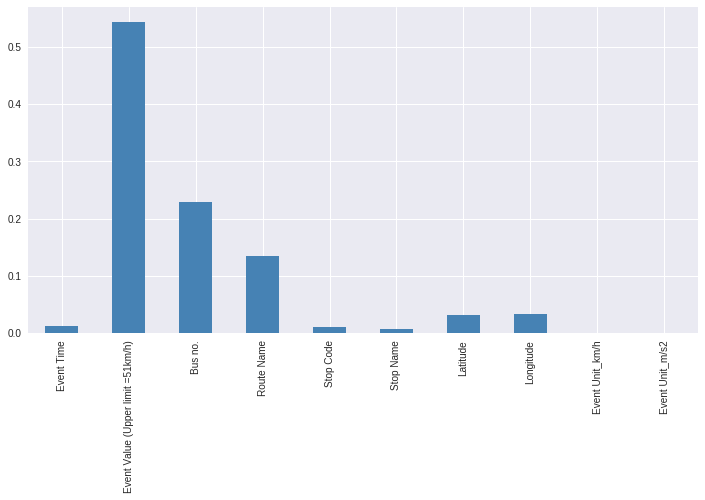

In [116]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()
clf.fit(X, y)

pd.Series(clf.feature_importances_, index=data.columns).plot.bar(color='steelblue', figsize=(12, 6))

In [134]:
from sklearn.feature_selection import SelectFromModel
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
trans = SelectFromModel(clf, threshold=0.05)
X_trans = trans.fit_transform(X, y)
print("We started with {0} features but retained only {1} of them!".format(X.shape[1] - 1, X_trans.shape[1]))

We started with 9 features but retained only 3 of them!


In [118]:
X_trans

array([[ 2.32730566, -0.68979388,  0.59115787, -0.89937936, -0.64900369],
       [ 2.32730566, -0.65140727,  0.69441745, -1.72333655,  0.3863414 ],
       [ 2.32730566, -0.68979388,  0.59115787, -0.89937936, -0.64900369],
       ...,
       [-0.46737637, -0.77936265,  1.0041962 ,  2.67534409,  0.25969664],
       [-0.46625697, -0.77936265,  1.0041962 ,  2.67534409,  0.25969664],
       [-0.46574391, -0.77936265,  1.0041962 ,  2.67534409,  0.25969664]])

In [66]:
y

array([2, 2, 2, ..., 0, 3, 3])

In [0]:
y= y.reshape(401399,)

In [77]:
X.shape[1]

8